**<h1 style= 'text-align: center'>Conditional Graph</h1>**

## 1. Objectives

- Implement conditional logic to route the flow of data to different nodes
- Use START and END nodes to manage entry and exit points explicitly.
- Design multiple nodes to perform differenr operations (addition, subtraction)
- Create a router node to handle decision-making and control graph flow

-> **Main Goal**: How to use "add_conditional_edge"

In [14]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [15]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [16]:
def adder(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    if state['operation'] == '+':
        return "addition_operation"         # return the decision-making edge
    
    elif state['operation'] == '-':
        return "subtraction_operation"

In [17]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)    # passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router", decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node",
    }
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()



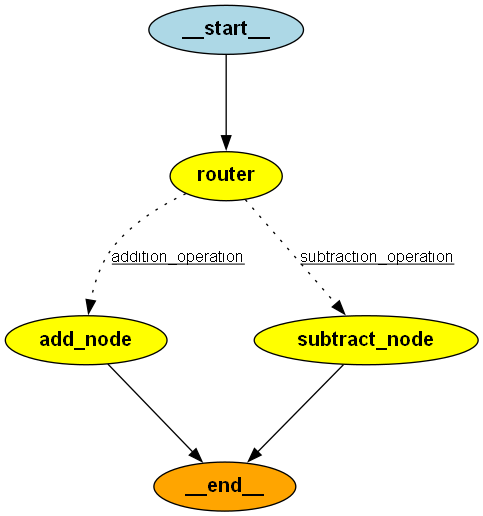

In [18]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_png()))

In [19]:
initial_state_1 = AgentState(number1 = 10, number2= 5, operation='+')
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}


## 2. Exercise

In [20]:
class AgentState2(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    finalNumber: int 
    finalNumber2: int

def adder_1(state: AgentState2) -> AgentState2:
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor_1(state: AgentState2) -> AgentState2:
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node_1(state: AgentState2) -> AgentState2:
    if state['operation1'] == '+':
        return "addition_operation_1"
    elif state['operation1'] == '-':
        return "subtraction_operation_1"
    
def adder_2(state: AgentState2) -> AgentState2:
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtractor_2(state: AgentState2) -> AgentState2:
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node_2(state: AgentState2) -> AgentState2:
    if state['operation2'] == '+':
        return "addition_operation_2"
    elif state['operation2'] == '-':
        return "subtraction_operation_2"



In [21]:
graph = StateGraph(AgentState2)

graph.add_node("add_node", adder_1)
graph.add_node("subtract_node", subtractor_1)
graph.add_node('router', lambda state:state)
graph.add_node("add_node2", adder_2)
graph.add_node("subtract_node2", subtractor_2)
graph.add_node('router2', lambda state:state)

graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router', decide_next_node_1,
    {
        'addition_operation_1': 'add_node',
        'subtraction_operation_1': 'subtract_node'
    }
)
graph.add_edge('add_node', 'router2')
graph.add_edge('subtract_node', 'router2')
graph.add_conditional_edges(
    'router2', decide_next_node_2,
    {
        'addition_operation_2': 'add_node2',
        'subtraction_operation_2': 'subtract_node2'
    }
)
graph.add_edge('add_node2', END)
graph.add_edge('subtract_node2', END)

app2 = graph.compile()

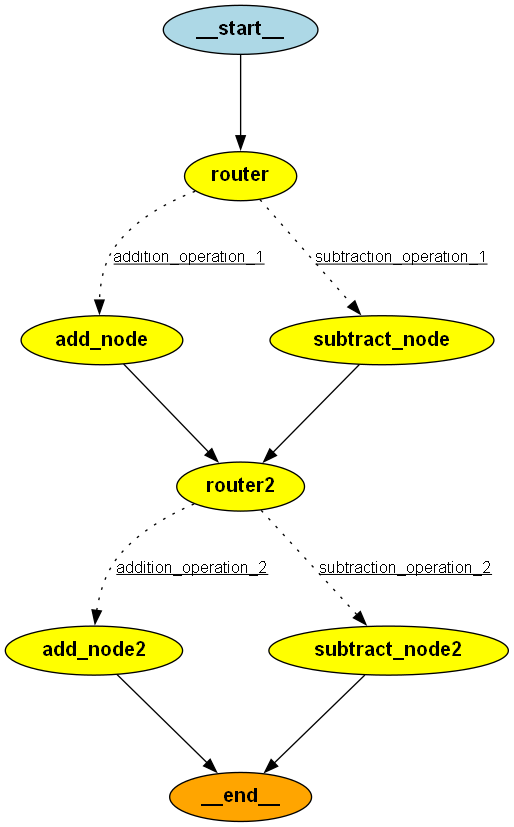

In [22]:
display(Image(app2.get_graph().draw_png()))

In [23]:
initial_state = AgentState2(number1=10, operation1='-', number2=5, number3=7, number4=2, operation2='+')

answer = app2.invoke(initial_state)
answer

{'number1': 10,
 'number2': 5,
 'number3': 7,
 'number4': 2,
 'operation1': '-',
 'operation2': '+',
 'finalNumber': 5,
 'finalNumber2': 9}